In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os
import stat
import math
import random

import shutil

from tqdm import tqdm

In [ ]:
%matplotlib inline

## Code Start

In [2]:
PLACEHOLDER_DIR = './Data/Placeholder/'
TRAINING_DIR = './Data/Training/'
TESTING_DIR = './Data/Testing/'
DEV_DIR = './Data/Dev/'

SPLIT_DIST = 0.1

batik_classes = os.listdir(PLACEHOLDER_DIR)

## Changing file permission

In [ ]:
for batik_class in batik_classes:
    dir = os.path.join(PLACEHOLDER_DIR, batik_class)
    dir_content = os.listdir(dir)

    for image in tqdm(dir_content, ascii = False, desc = batik_class):
        dst_dir = os.path.join(dir, image)
        os.chmod(dst_dir, stat.S_IRWXU)

----------------------------------------------
# !RUN WITH CAUTION!
## Data Splitting
 Making the DIR necessary for storing images and spreading it from PLACEHOLDER_DIR to apropriate dir

In [ ]:
# MKDIR data subdir
try:
    os.mkdir(TRAINING_DIR)
    os.mkdir(TESTING_DIR)
    os.mkdir(DEV_DIR)
except:
    print('Data subdir folder already exist')

# MKDIR working subdir
for batik_class in batik_classes:
    try:
        dir = os.path.join(TRAINING_DIR, batik_class)
        os.mkdir(dir)

        dir = os.path.join(TESTING_DIR, batik_class)
        os.mkdir(dir)

        dir = os.path.join(DEV_DIR, batik_class)
        os.mkdir(dir)
    except:
        print('Working subdir folder already exist')
        break

# Actually moving things around 
for batik_class in batik_classes:
    dir = os.path.join(PLACEHOLDER_DIR, batik_class)
    dir_content = os.listdir(dir)

    # Calculating how much image for splitting
    split_dist = math.ceil(len(dir_content) * SPLIT_DIST)

    # Picking random images
    testing_images = random.choices(dir_content, k = split_dist)

    # Moving things around
    for image in tqdm(dir_content, desc = batik_class):
        # If image is picked for testing
        if image in testing_images:
            src_dir = os.path.join(dir, image)
            dst_dir = os.path.join(TESTING_DIR, batik_class)

            shutil.copy(src_dir, dst_dir)
        else:
            src_dir = os.path.join(dir, image)
            dst_dir = os.path.join(TRAINING_DIR, batik_class)

            shutil.copy(src_dir, dst_dir)

## Purge images from working dir

In [ ]:
def purge_working_image(target):
    for batik_class in tqdm(batik_classes, desc = target):
        dir = os.path.join(target, batik_class)
        
        #print('Deleting ' + dir)
        shutil.rmtree(dir, ignore_errors = True)

In [ ]:
purge_working_image(TRAINING_DIR)
purge_working_image(TESTING_DIR)
purge_working_image(DEV_DIR)

----------------------------------------------

## Counting total images

In [3]:
def count_batik(target):
    try:
        batik_counter = {}

        for batik_class in batik_classes:
            dir = os.path.join(target, batik_class)
            dir_content = os.listdir(dir)

            batik_counter[batik_class] = 0
            for image in dir_content:
                batik_counter[batik_class] += 1
    except:
        print('Directory Empty!')
        print()
    else:
        for i in batik_counter:
            print(i + ' = ' + str(batik_counter[i]))

        print()
        print('Total images: ' + str(sum(batik_counter.values())))

In [4]:
print('RAW IMAGES')
print('-------------------------------------')

count_batik(PLACEHOLDER_DIR)

print('TRAINING IMAGES')
print('-------------------------------------')

count_batik(TRAINING_DIR)

print('TESTING IMAGES')
print('-------------------------------------')

count_batik(TESTING_DIR)

print('DEV IMAGES')
print('-------------------------------------')

count_batik(DEV_DIR)

RAW IMAGES
-------------------------------------
batik-bali = 49
batik-betawi = 43
batik-celup = 27
batik-cendrawasih = 25
batik-ceplok = 30
batik-ciamis = 34
batik-garutan = 31
batik-gentongan = 36
batik-kawung = 40
batik-keraton = 36
batik-lasem = 46
batik-megamendung = 46
batik-parang = 45
batik-pekalongan = 47
batik-priangan = 38
batik-sekar = 24
batik-sidoluhur = 45
batik-sidomukti = 34
batik-sogan = 23
batik-tambal = 31

Total images: 730
TRAINING IMAGES
-------------------------------------
batik-bali = 44
batik-betawi = 39
batik-celup = 24
batik-cendrawasih = 23
batik-ceplok = 28
batik-ciamis = 30
batik-garutan = 27
batik-gentongan = 32
batik-kawung = 36
batik-keraton = 34
batik-lasem = 42
batik-megamendung = 41
batik-parang = 40
batik-pekalongan = 43
batik-priangan = 34
batik-sekar = 21
batik-sidoluhur = 41
batik-sidomukti = 30
batik-sogan = 21
batik-tambal = 27

Total images: 657
TESTING IMAGES
-------------------------------------
batik-bali = 5
batik-betawi = 4
batik-celup 

## Data Augmentation

In [15]:
IMAGE_SHAPE = [200, 200]

In [16]:
training_datagen = ImageDataGenerator(
    # Might need further augmentation
    rescale=1/255.0
)

testing_datagen = ImageDataGenerator(
    rescale=1/255.0
)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32
)

testing_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32
)

Found 657 images belonging to 20 classes.
Found 73 images belonging to 20 classes.


## Model

In [17]:
efn_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=IMAGE_SHAPE + [3]
)

In [7]:
efn_model.trainable = False

In [18]:
efn_model.summary()

and[0][0]          
__________________________________________________________________________________________________
block5b_project_conv (Conv2D)   (None, 13, 13, 112)  75264       block5b_se_excite[0][0]          
__________________________________________________________________________________________________
block5b_project_bn (BatchNormal (None, 13, 13, 112)  448         block5b_project_conv[0][0]       
__________________________________________________________________________________________________
block5b_drop (Dropout)          (None, 13, 13, 112)  0           block5b_project_bn[0][0]         
__________________________________________________________________________________________________
block5b_add (Add)               (None, 13, 13, 112)  0           block5b_drop[0][0]               
                                                                 block5a_project_bn[0][0]         
_________________________________________________________________________________________

In [19]:
model_input = tf.keras.Input(shape=IMAGE_SHAPE + [3])
x = efn_model(model_input)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
model_output = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(model_input, model_output)

In [ ]:
'''
Vanilla model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    #20 Batik class, might add more later?
    tf.keras.layers.Dense(20, activation = 'softmax')
])

model.summary()
'''

## Compiling

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training

In [13]:
history = model.fit(
    training_generator,
    validation_data=testing_generator,
    epochs=10
)

Epoch 1/10
21/21 [==============================] - 56s 2s/step - loss: 10.8337 - accuracy: 0.0548 - val_loss: 3.0293 - val_accuracy: 0.0548
Epoch 2/10
21/21 [==============================] - 18s 823ms/step - loss: 3.0245 - accuracy: 0.0426 - val_loss: 2.9952 - val_accuracy: 0.0548
Epoch 3/10
21/21 [==============================] - 13s 610ms/step - loss: 2.9980 - accuracy: 0.0639 - val_loss: 2.9947 - val_accuracy: 0.0548
Epoch 4/10
21/21 [==============================] - 13s 604ms/step - loss: 2.9986 - accuracy: 0.0578 - val_loss: 2.9940 - val_accuracy: 0.0548
Epoch 5/10
21/21 [==============================] - 20s 947ms/step - loss: 3.0010 - accuracy: 0.0639 - val_loss: 2.9933 - val_accuracy: 0.0548
Epoch 6/10
21/21 [==============================] - 25s 1s/step - loss: 2.9922 - accuracy: 0.0639 - val_loss: 2.9925 - val_accuracy: 0.0548
Epoch 7/10
21/21 [==============================] - 26s 1s/step - loss: 2.9913 - accuracy: 0.0639 - val_loss: 2.9918 - val_accuracy: 0.0548
Epoch 8

## Graphing

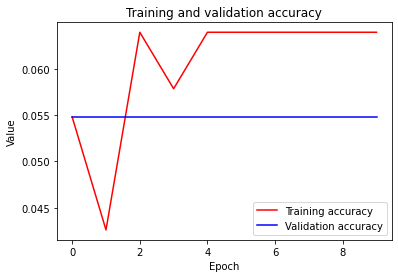

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc=0)
plt.show()